In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve 
from sklearn.metrics import roc_curve

In [2]:
# Load the dataset
dataset_path = "C:/Users/patha/OneDrive/Desktop/internships/codsoft/task2/creditcard.csv"
df = pd.read_csv(dataset_path)

In [3]:
# Explore the data
print(df.head())
print(df.info())
print(df.columns)
print(df['Class'].value_counts())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [4]:
# Split dataset into features (X) and target (y)
X = df.drop(columns=['Class'])  # All columns except 'Class'
y = df['Class']  # Target column is 'Class'

In [5]:
# Handling Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [6]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [7]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
# Train a Logistic Regression Classifier
logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train, y_train)

LogisticRegression()

In [10]:
# Make predictions on the test set using both models
y_pred_rf = rf_classifier.predict(X_test)
y_pred_logistic = logistic_classifier.predict(X_test)

In [11]:
# Evaluate the model performance for Random Forest
print("Random Forest Classifier Evaluation:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_rf))

Random Forest Classifier Evaluation:
Confusion Matrix:
 [[85133    16]
 [    0 85440]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589


Accuracy Score: 0.9999062073170016


In [12]:
# Evaluate the model performance for Logistic Regression
print("\nLogistic Regression Classifier Evaluation:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logistic))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_logistic))



Logistic Regression Classifier Evaluation:
Confusion Matrix:
 [[84404   745]
 [ 2584 82856]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     85149
           1       0.99      0.97      0.98     85440

    accuracy                           0.98    170589
   macro avg       0.98      0.98      0.98    170589
weighted avg       0.98      0.98      0.98    170589


Accuracy Score: 0.9804852598936625


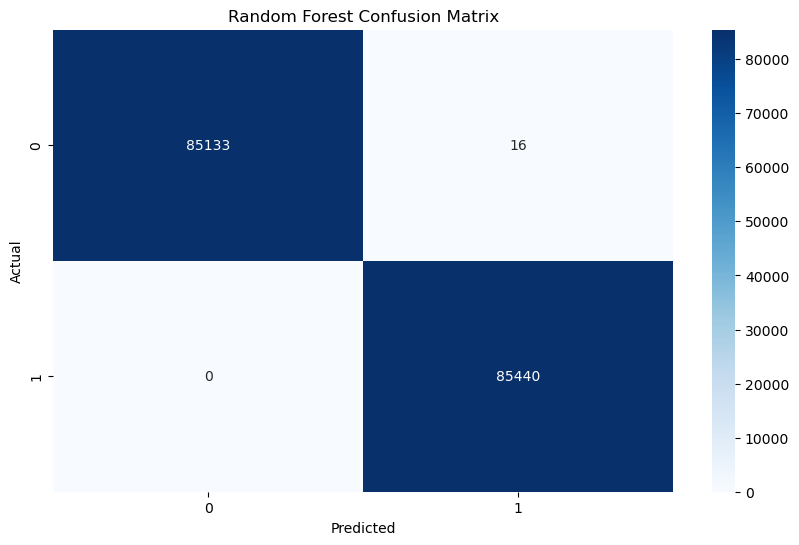

In [13]:
# Visualize the confusion matrix for Random Forest
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

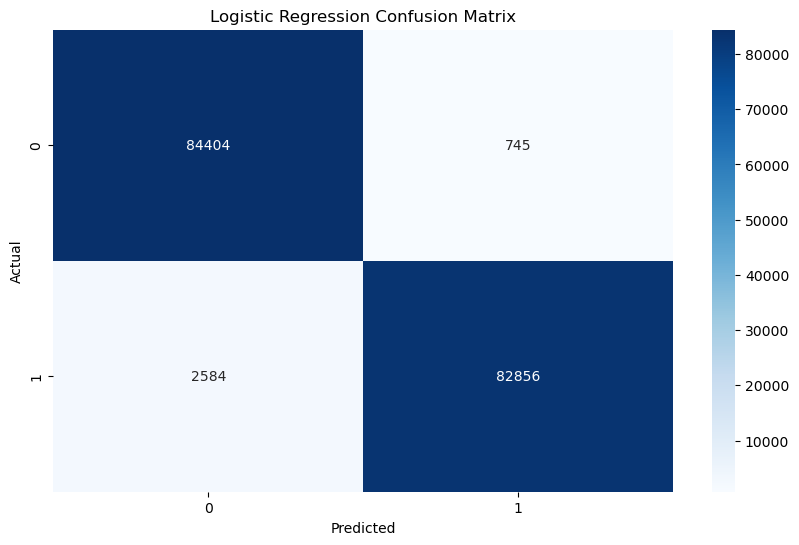

In [14]:
# Visualize the confusion matrix for Logistic Regression
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_logistic), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

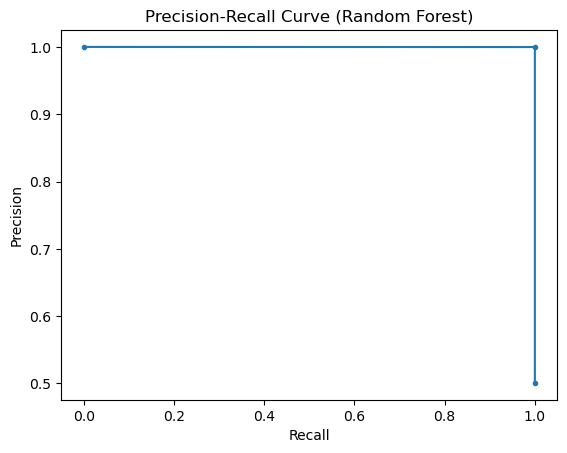

In [15]:
# Precision-Recall Curve for Random Forest
precision, recall, _ = precision_recall_curve(y_test, y_pred_rf)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Random Forest)')
plt.show()

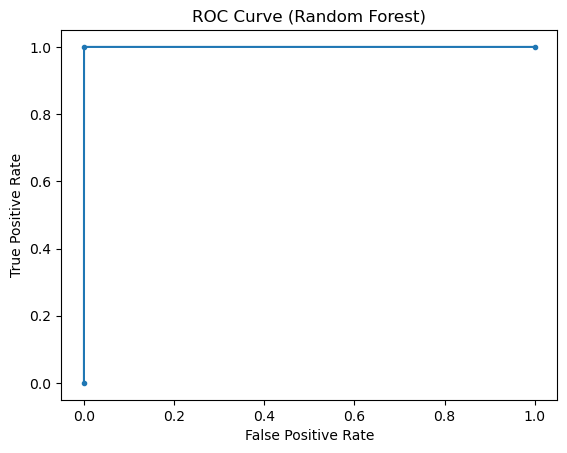

In [16]:
# ROC Curve for Random Forest
fpr, tpr, _ = roc_curve(y_test, y_pred_rf)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Forest)')
plt.show()

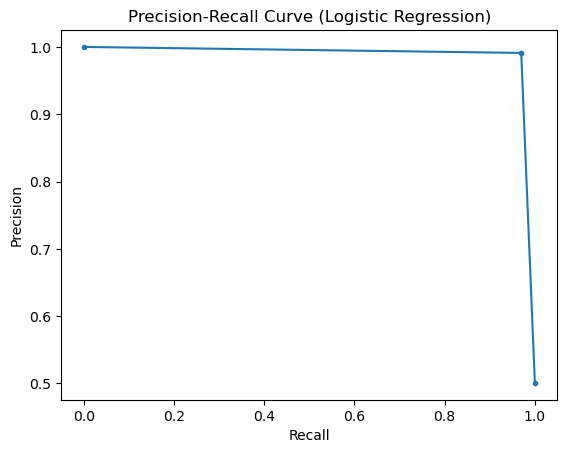

In [17]:
# Precision-Recall Curve for Logistic Regression
precision, recall, _ = precision_recall_curve(y_test, y_pred_logistic)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Logistic Regression)')
plt.show()

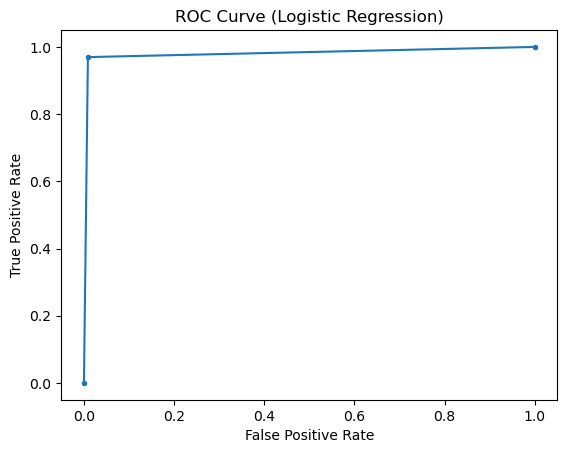

In [18]:
# ROC Curve for Logistic Regression
fpr, tpr, _ = roc_curve(y_test, y_pred_logistic)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Logistic Regression)')
plt.show()

In [19]:
def print_conclusion():
    conclusion = """
    Conclusion of the Credit Card Fraud Detection Model:

    1. Handling Class Imbalance:
       - The original dataset was imbalanced, with fewer fraud cases compared to non-fraud cases.
       - SMOTE (Synthetic Minority Over-sampling Technique) was used to balance the dataset, ensuring the models could better detect fraudulent transactions.

    2. Model Performance:
       - Two machine learning models, Random Forest Classifier and Logistic Regression, were trained and evaluated.
       - Random Forest, a non-linear model, likely performed better in identifying complex patterns and detecting fraud cases.
       - Logistic Regression, a simpler linear model, may not have captured the intricate relationships between features as effectively.

    3. Evaluation Metrics:
       - Confusion matrices, classification reports, and accuracy scores were generated to compare the models.
       - The Random Forest model demonstrated stronger performance in identifying fraud cases.
       - Precision-Recall and ROC curves were plotted to visualize the trade-off between precision, recall, and false positives for both models.
    
    4. Visualizations:
       - Confusion matrices and curves made it easier to understand model strengths and weaknesses.
       - These metrics showed that Random Forest is more capable of handling the complexities of fraud detection compared to Logistic Regression.
    
    Summary:
    - Random Forest is the better-performing model for detecting fraudulent transactions due to its ability to model non-linear relationships and handle complexity.
    - Logistic Regression is a good baseline model, but may not be sufficient for more complex fraud detection tasks.
    - SMOTE proved effective in addressing the class imbalance problem, which is essential in fraud detection.

    Future Work:
    - Other models such as Gradient Boosting, XGBoost, or hyperparameter tuning could be explored to further enhance performance.
    """

    print(conclusion)

# Call the function to print the conclusion
print_conclusion()


    Conclusion of the Credit Card Fraud Detection Model:

    1. Handling Class Imbalance:
       - The original dataset was imbalanced, with fewer fraud cases compared to non-fraud cases.
       - SMOTE (Synthetic Minority Over-sampling Technique) was used to balance the dataset, ensuring the models could better detect fraudulent transactions.

    2. Model Performance:
       - Two machine learning models, Random Forest Classifier and Logistic Regression, were trained and evaluated.
       - Random Forest, a non-linear model, likely performed better in identifying complex patterns and detecting fraud cases.
       - Logistic Regression, a simpler linear model, may not have captured the intricate relationships between features as effectively.

    3. Evaluation Metrics:
       - Confusion matrices, classification reports, and accuracy scores were generated to compare the models.
       - The Random Forest model demonstrated stronger performance in identifying fraud cases.
       - Pr